In [3]:
#Big Mart Sales Data
#Importing the libraries
#Importing Pandas Library for reading the files
import pandas as pd
#Now reading the data file Train.csv
df=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\Technocolabs\\Train.csv")
df.head()
df.tail()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [7]:
#To know dimension of the dataset
df.shape
# In the dataset given there are total 8523 rows and 12 columns

(8523, 12)

In [ ]:
# Now to analyze the data and do feature engineering on this dataset ,we are having both train and test data separately.
# So we will combine both these into and we will perform the Exploratory Data Analysis on the model and we will divide 
#the model into train and test datasets

In [4]:
train=pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\Technocolabs\\Train.csv")
train.head()

test =pd.read_csv("C:\\Users\\ACER\\OneDrive\\Desktop\\Technocolabs\\Test.csv")
test.head()
#Now we will add one more column extra so that we will get to the know from the data which is train and test data
train['source']='train'
test['source']='test'
train.head()
test.head()

#Now we will combine the two datasets
databig_mart=pd.concat([train,test],ignore_index=True)
databig_mart.head()
databig_mart.shape
print (train.shape,test.shape,databig_mart.shape)
#So , now we are having equal no.of.columns in the combined data test also

(8523, 13) (5681, 12) (14204, 13)


In [24]:
#Perform the summary statistics on the entire dataset
databig_mart.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
databig_mart.apply(lambda x:sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [ ]:
From the summary statistics the following points can be infered
Item_Visibility : Minimum value for the Item Visibility is given as zero,but if there is a product in the store then 
there will be no scope such as Item Visibility as zero
Missing Values : Now the two columns Item_weight and Outlet_size are having missing values.

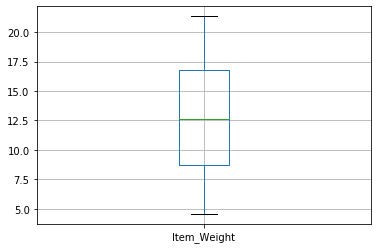

In [51]:
#Univariate Analysis for each column
databig_mart['Item_Weight'].describe()
databig_mart['Item_Weight'].median()
databig_mart['Item_Weight'].mode()
databig_mart['Item_Weight'].skew(axis=0)
databig_mart.boxplot(column='Item_Weight')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026358E8B2C8>]],
      dtype=object)

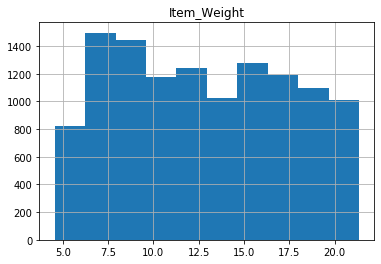

In [52]:
#Historgram of Item_Weight Column
databig_mart.hist(column='Item_Weight')
#We can infer that Item_weight is slightly right skewed as some of the items may be more weighing

count    14204.000000
mean         0.065953
std          0.051459
min          0.000000
25%          0.027036
50%          0.054021
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64
0.05402053650000001
0    0.0
dtype: float64
1.1951751774587889


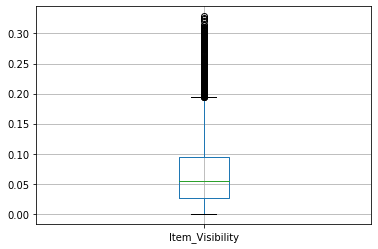

In [54]:
#Item _Visibility
print(databig_mart['Item_Visibility'].describe())
print(databig_mart['Item_Visibility'].median())
print(databig_mart['Item_Visibility'].mode())
print(databig_mart['Item_Visibility'].skew(axis=0))
databig_mart.boxplot(column='Item_Visibility')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026358F7CB08>]],
      dtype=object)

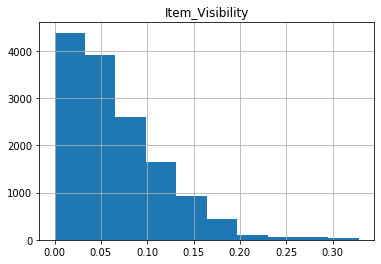

In [55]:
databig_mart.hist(column='Item_Visibility')
# From the box plot and histogram it is clearly understood that Item_Visibility is heavily right skewed and
#there are so many outliers for this columns.One reason could be the minimum item visibility is zero,which is not appropriate

count    14204.000000
mean       141.004977
std         62.086938
min         31.290000
25%         94.012000
50%        142.247000
75%        185.855600
max        266.888400
Name: Item_MRP, dtype: float64
142.247
0.13072836040225863
0    172.0422
dtype: float64


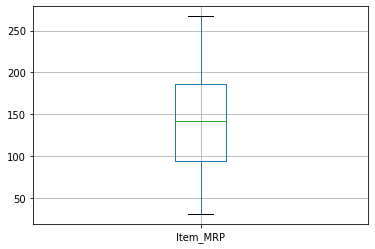

In [56]:
# Univariate Analysis for Item_MRP
print(databig_mart['Item_MRP'].describe())
print(databig_mart['Item_MRP'].median())
print(databig_mart['Item_MRP'].skew(axis=0))
print(databig_mart['Item_MRP'].mode())
databig_mart.boxplot(column='Item_MRP')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000026358F31B48>]],
      dtype=object)

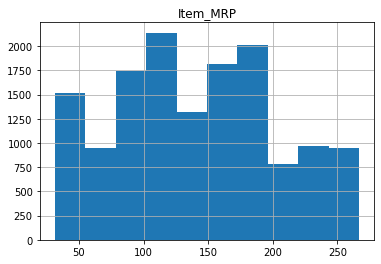

In [57]:
databig_mart.hist(column='Item_MRP')
#From the histogram we could see that Items of Mrp in range of 100 to 125 are having more purchases and after that from 175 to 190 are 
#the second highest.We will have a look at the product which is in the range of 100 to 125 and 175 to 190

In [71]:
databig_mart['Item_MRP'].values

array([ 31.29  ,  31.49  ,  31.89  , ..., 266.6884, 266.8884, 266.8884])

In [18]:
#Univariate Analysis for categorical variable
categorical_columns = [x for x in databig_mart.dtypes.index if databig_mart.dtypes[x]=='object']
#Exclude ID cols and source:
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier','source']]
for col in categorical_columns:
    print ('\nFrequency of Categories for varible %s'%col)
    print (databig_mart[col].value_counts())



Frequency of Categories for varible Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for varible Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for varible Outlet_Size
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

Frequency of Categories for varible Outlet_Location_Type
Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

F

In [ ]:
 Item Fat content :Now from the categorical variables frequencies we will draw inferences
Item Fat Content: Low fat content food is being preferred by most of the customers.As part of data correction 
we need to convert all Low fat values to a single name such as Low Fat.
 Item Outlet Size: Outlets with Medium size are more being preferred and the sales outcome is more from these stores.
 Outlet_Location_type: Tier3 outlets are more being preferred and the sales outcome is more from these stores.
 Outlet_Type :Type 1 Supermarkets will be having more demand and the sales would be preferably more from these stores.
 

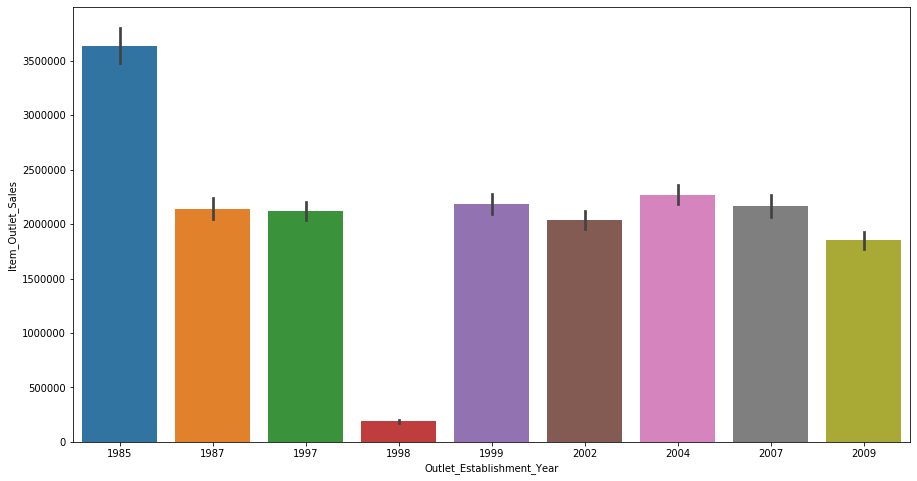

In [4]:
# Bivariate Analysis on the data set
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,8))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',estimator=sum,data=databig_mart)

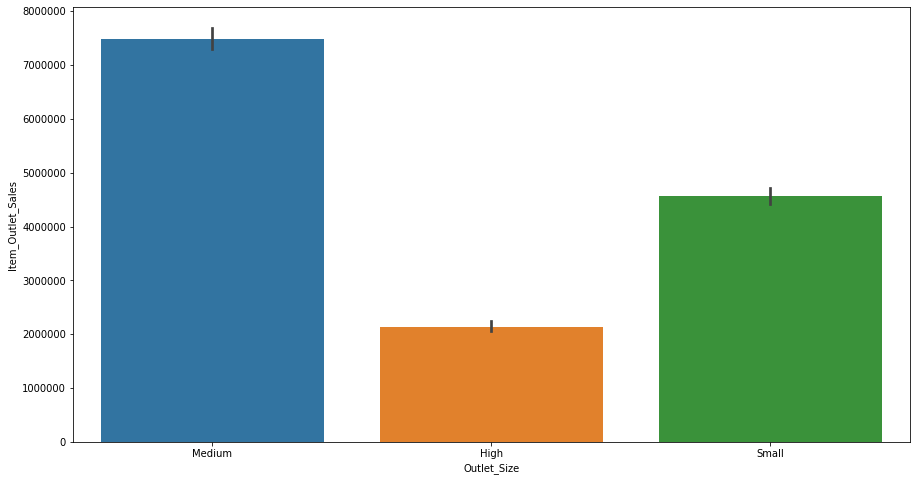

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',estimator=sum,data=databig_mart)

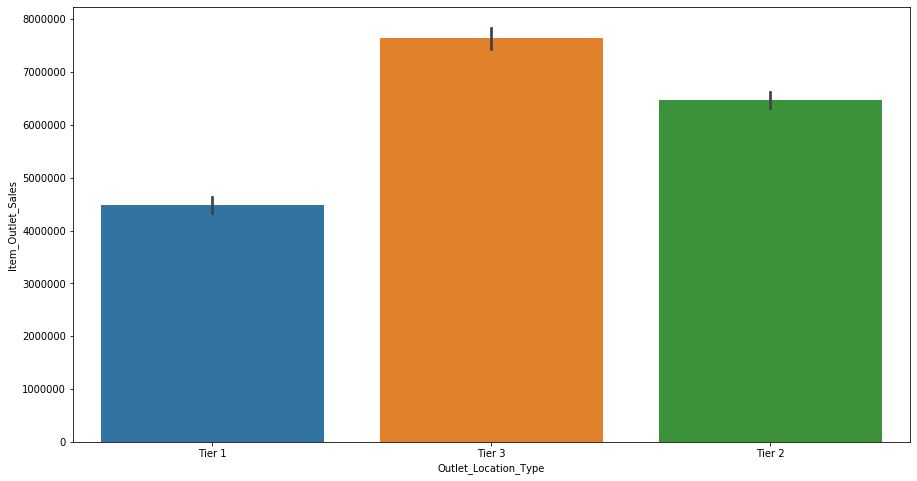

In [23]:
plt.figure(figsize=(15,8))
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',estimator=sum,data=databig_mart)


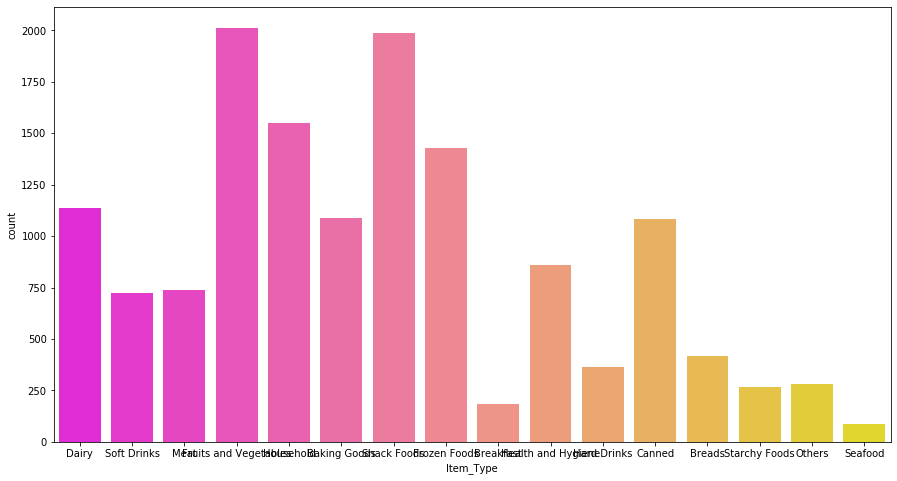

In [34]:
plt.figure(figsize=(15,8))
sns.countplot('Item_Type',data=databig_mart,palette='spring')


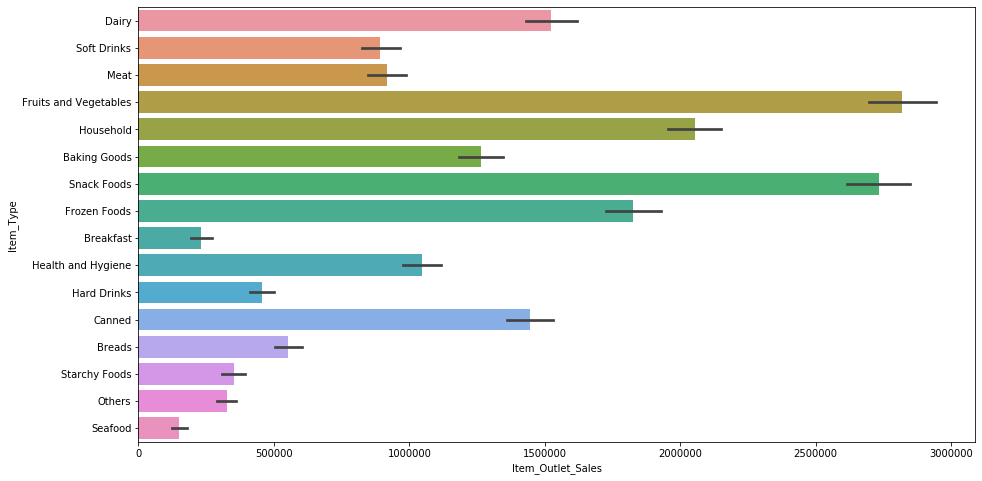

In [8]:
plt.figure(figsize=(15,8))
sns.barplot(x='Item_Outlet_Sales',y='Item_Type',estimator=sum,data=databig_mart)

In [ ]:
From both of the above graphs, we could see that fruits and vegetables has highest number of sales.

Text(0, 0.5, 'Item Outlet Sales')

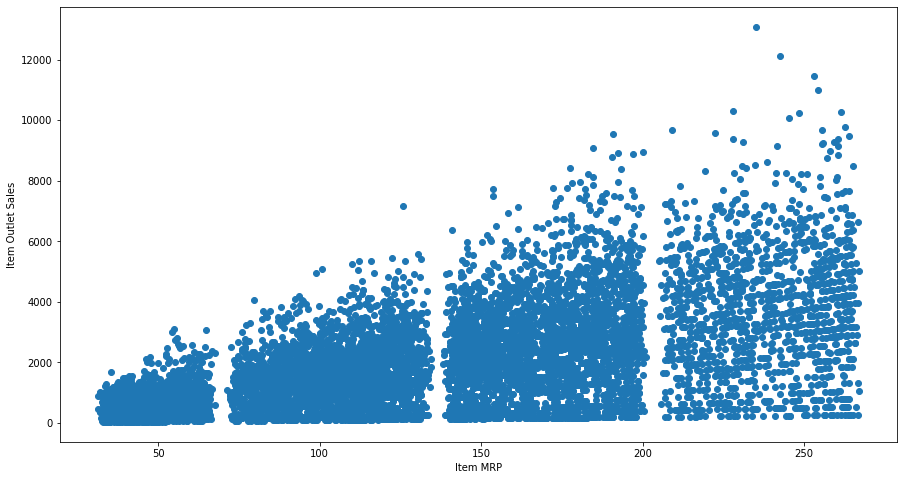

In [6]:
plt.figure(figsize=(15,8))
plt.scatter(y='Item_Outlet_Sales',x='Item_MRP',data=train)
plt.xlabel('Item MRP')
plt.ylabel('Item Outlet Sales')

In [ ]:
From the above scatter plot we could see that Item MRP between 200 and 250 are having more Item outlet sales

<Figure size 14400x576 with 0 Axes>

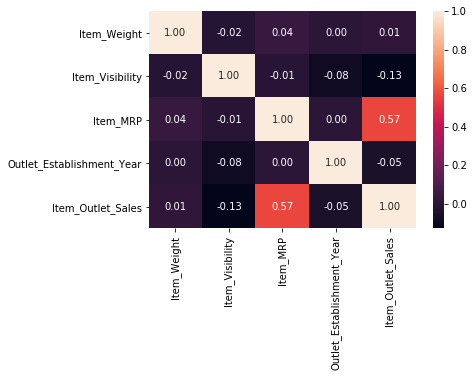

<Figure size 14400x576 with 0 Axes>

In [31]:
#Heat Map
#correlation Matrix need to be plotted for continous variables 
databig_mart.columns
databig_mart_corr=databig_mart[['Item_Weight','Item_Visibility','Item_Outlet_Sales']]
sns.heatmap(databig_mart.corr(),annot=True,fmt=".2f") 
plt.figure(figsize=(200,8))

In [ ]:
From the correlation matrix we could see that Item MRP is having good correlation of value 0.57 with Item outletsales.Lets keep this in mind
and let us see whether our model also predicts the same

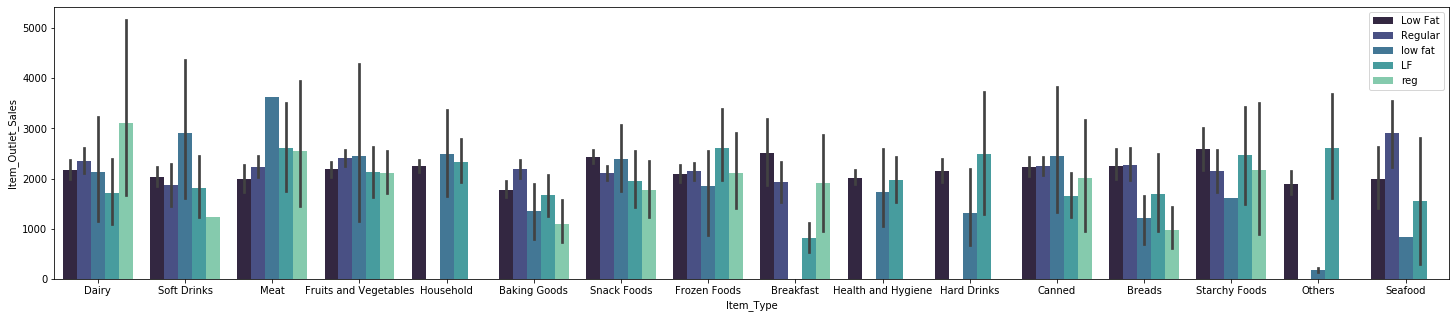

In [7]:
#Multivariate Analysis
plt.figure(figsize=(25,5))
sns.barplot('Item_Type','Item_Outlet_Sales',hue='Item_Fat_Content',data=databig_mart,palette='mako')
plt.legend()

In [ ]:
Now we could observe that fat content LF,low fat and Low Fat are come under Low Fat same applies reg.We need to correct this in the data set

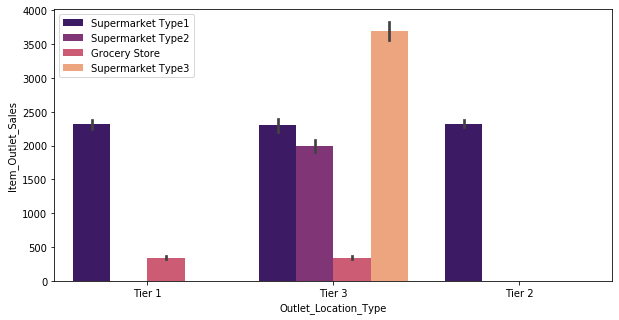

In [9]:
plt.figure(figsize=(10,5))
sns.barplot('Outlet_Location_Type','Item_Outlet_Sales',hue='Outlet_Type',data=databig_mart,palette='magma')
plt.legend()

In [11]:
# Missing values imputation
Now for the missing values in both Item_Weight and Outlet_size there are no outliers ,we will impute Item_weight with mean of the Item_weight column 
and outlet_size by mode of the column



SyntaxError: invalid syntax (<ipython-input-11-3c17bdbccab3>, line 2)

In [5]:
databig_mart['Item_Weight']= databig_mart['Item_Weight'].fillna(databig_mart['Item_Weight'].mean())

databig_mart['Item_Weight'].isnull().sum()

0

In [6]:
databig_mart['Outlet_Size']=databig_mart['Outlet_Size'].fillna(databig_mart['Outlet_Size'].mode()[0])

databig_mart['Outlet_Size'].isnull().sum()

0

In [ ]:
Feature Engineering
As part of Feature Engineering first we will modify the Item_Visibility column where rows are having as zero we will replace with the mean

In [7]:
databig_mart['Item_Visibility']=databig_mart['Item_Visibility'].replace(0,databig_mart['Item_Visibility'].mean())

print(databig_mart['Item_Visibility'])

databig_mart['Item_Visibility'].describe()

0        0.016047
1        0.019278
2        0.016760
3        0.065953
4        0.065953
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.065953
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64


count    14204.000000
mean         0.070034
std          0.048602
min          0.003575
25%          0.033143
50%          0.062347
75%          0.094037
max          0.328391
Name: Item_Visibility, dtype: float64

In [ ]:
  Creating a combined column for Identifier as Identifier name starts with FD,DR and NC .They are Food ,drinks and Non consumable

In [8]:
databig_mart['Item_Combined']=databig_mart['Item_Identifier'].apply(lambda x:x[0:2])
databig_mart['Item_Combined'] = databig_mart['Item_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
databig_mart['Item_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Combined, dtype: int64

In [ ]:
 Now in the data we have output establishment Year ,to understand better and from the problem statement the data is been collected in the year 2013.Now as we are analyzingin this year 
  create a new column such as No.of.Years of Establishment

In [9]:
databig_mart['Outlet_Establishment_Year']=2020-databig_mart['Outlet_Establishment_Year']
databig_mart['Outlet_Establishment_Year'].describe()
databig_mart['Outlet_Establishment_Year'].head()

0    21
1    11
2    21
3    22
4    33
Name: Outlet_Establishment_Year, dtype: int64

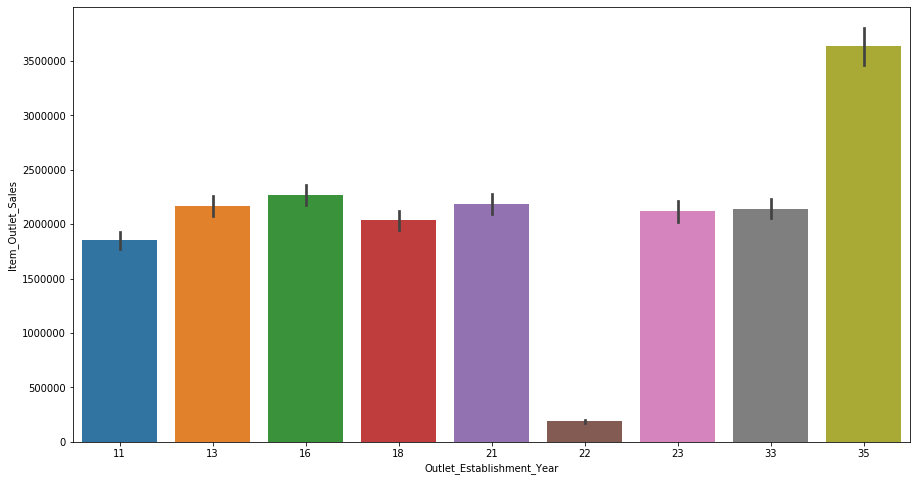

In [32]:
plt.figure(figsize=(15,8))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',estimator=sum,data=databig_mart)

In [ ]:
  Now we will modify the Item_Fat_Content column 

In [10]:
print ('\nOriginal Categories:')
print (databig_mart['Item_Fat_Content'].value_counts())

print ('\nModified Categories:')
databig_mart['Item_Fat_Content'] = databig_mart['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})
print (databig_mart['Item_Fat_Content'].value_counts())



Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [39]:
databig_mart.loc[databig_mart['Item_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
databig_mart['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [ ]:
                                 Encoding for categorical variables

In [ ]:
Label Encoding 

In [11]:
from sklearn.preprocessing import LabelEncoder

l=LabelEncoder()
databig_mart['Outlet']=l.fit_transform(databig_mart['Outlet_Identifier'])
print(databig_mart['Outlet'])

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Combined','Outlet_Type','Outlet']
l = LabelEncoder()
for i in var_mod:
    databig_mart[i] = l.fit_transform(databig_mart[i])
    

print(databig_mart.head())

0        9
1        3
2        9
3        0
4        1
        ..
14199    8
14200    3
14201    7
14202    2
14203    7
Name: Outlet, Length: 14204, dtype: int32
  Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30                 0         0.016047   
1           DRC01         5.92                 1         0.019278   
2           FDN15        17.50                 0         0.016760   
3           FDX07        19.20                 1         0.065953   
4           NCD19         8.93                 0         0.065953   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type  \
0    

In [ ]:
In this process we could proceed with label encoding itself because of two reasons.
1.All our categorical variables are ordinal 
2.As this is a regression problem, when we convert into one hot encoding,there might be a problem of multi collinearity between the independent variables
which violates the assumption of linear regression.

In [ ]:
                                               Export our data

In [ ]:
Now we will drop the columns which we converted i.e Item_Identifier and Outlet_Identifier and will divide the data set into train
and test data sets.

In [12]:
databig_mart.drop(['Item_Identifier','Outlet_Identifier',axis=1,inplace=True])
databig_mart.drop(['Item_Type'],axis=1,inplace=True)
print(databig_mart)

SyntaxError: invalid syntax (<ipython-input-12-c8cfcd7451de>, line 1)

In [ ]:
#Divide into test and train:
train = databig_mart.loc[databig_mart['source']=="train"]
test = databig_mart.loc[databig_mart['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [78]:
train.head()


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Combined,Outlet
0,9.30,0,0.016047,249.8092,21,1,0,1,3735.1380,1,9
1,5.92,2,0.019278,48.2692,11,1,2,2,443.4228,0,3
2,17.50,0,0.016760,141.6180,21,1,0,1,2097.2700,1,9
3,19.20,2,0.065953,182.0950,22,1,2,0,732.3800,1,0
4,8.93,1,0.065953,53.8614,33,0,2,1,994.7052,2,1


In [79]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Combined,Outlet
8523,20.750000,0,0.007565,107.8622,21,1,0,1,1,9
8524,8.300000,2,0.038428,87.3198,13,1,1,1,1,2
8525,14.600000,1,0.099575,241.7538,22,1,2,0,2,0
8526,7.315000,0,0.015388,155.0340,13,1,1,1,1,2
8527,12.792854,2,0.118599,234.2300,35,1,2,3,1,5


In [ ]:
                                               Model Building


In [16]:
#Linear Regression
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
Predictors=train[['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Combined','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year','Outlet']]
Target=train[['Item_Outlet_Sales']]
Predictors_train,Predictors_test,Target_train,Target_test = train_test_split(Predictors,Target,test_size=0.2,random_state=22)
print(Predictors_train)
#print(Predictors_test)
#print(Target_train)
#print(Target_test)
#f= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Combined','Item_MRP','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_Establishment_Year','Outlet']
print(f)

KeyError: "['Outlet', 'Item_Combined'] not in index"

In [ ]:
#Linear Regression Model and Predictions on the train data set
LR = LinearRegression(normalize=True)
LR.fit(Predictors_train,Target_train)
predictions = LR.predict(Predictors_test)
print(predictions)


In [88]:
import numpy as np
#Print model report:
print ("\nModel Report")
print ("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(Target_test,predictions)))
print ("MSE : %.4g"% (metrics.mean_squared_error(Target_test,predictions)))



Model Report
RMSE : 1246
MSE : 1.553e+06


In [110]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor
RF= RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4,random_state=22)

# Fitting the model on our trained dataset.
RF.fit(Predictors_train,Target_train)

# Making Predictions
y_pred = RF.predict(Predictors_test)

C:\Users\ACER\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [111]:
coef3 = pd.Series(RF.feature_importances_, f).sort_values(ascending=False)
coef3

Item_MRP                     0.543676
Outlet_Type                  0.400533
Outlet_Establishment_Year    0.054548
Outlet                       0.000460
Outlet_Location_Type         0.000252
Item_Weight                  0.000249
Item_Visibility              0.000247
Outlet_Size                  0.000021
Item_Fat_Content             0.000012
Item_Combined                0.000000
dtype: float64

In [121]:
#Perform cross-validation:
# Linear Regression
scores = cross_val_score(LinearRegression(), Predictors, Target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

    

Accuracy: 0.51 (+/- 0.03)


In [122]:
#Cross Validation for Random Forest
scores = cross_val_score(RandomForestRegressor(), Predictors, Target, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\ACER\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was pa

Accuracy: 0.55 (+/- 0.03)


NameError: name 'LR' is not defined